In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


#Explanation

numpy → numerical operations

pandas → tabular data handling

matplotlib → visualization

## Scikit-learn tools:

load_diabetes → built-in dataset with multiple features

train_test_split → separates training and testing data

StandardScaler → scales features to same range

Lasso → linear regression with L1 regularization

mean_squared_error → evaluates prediction error

In [2]:
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


E## explanation

load_diabetes() returns:

data.data → feature values

data.target → target variable (disease progression)

X → input features (independent variables)

y → output value we want to predict

X.head() → preview first few rows

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## explanation

Lasso penalizes coefficients directly

If features have different scales:

Large-scale features dominate

Penalty becomes unfair

fit_transform():

Learns mean & std from training data

Scales training features

transform():

Applies same scaling to test data

Prevents data leakage

In [5]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)


,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.1
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


Explanation

alpha controls penalty strength

Higher alpha → more aggressive feature removal

fit():

Learns coefficients

Minimizes:

error
+
𝛼
∑
∣
𝛽
∣
error+α∑∣β∣

In [6]:
y_pred = lasso.predict(X_test_scaled)


In [7]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2884.624288735213


So this value means:

On average, the squared error is ~2884

The unit is (target units)²

Because of squaring, MSE always looks large.

2. Convert MSE to something intuitive (RMSE)

Take the square root:

RMSE
=
2884
≈
53.7
RMSE=
2884
	​

≈53.7

Interpretation:

Your predictions are off by about ±54 units on average.

That is the number that humans understand.

3. Is this good or bad?

For the diabetes dataset:

Target values range roughly from 25 to 346

Typical RMSE values:

Linear Regression → ~55

Lasso → ~53–60 (depends on alpha)

Ridge → ~52–58

So your result is normal and valid.

Nothing is broken.

In [8]:
import numpy as np

rmse = np.sqrt(2884.624288735213)
print("RMSE:", rmse)


RMSE: 53.708698445737944


In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

lr_pred = lr.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_pred)

print("Linear Regression MSE:", lr_mse)
print("Linear Regression RMSE:", np.sqrt(lr_mse))


Linear Regression MSE: 2900.193628493484
Linear Regression RMSE: 53.85344583676595


In [10]:
alphas = [0.001, 0.01, 0.05, 0.1, 0.5, 1]
results = []

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_scaled, y_train)
    pred = lasso.predict(X_test_scaled)
    mse = mean_squared_error(y_test, pred)
    non_zero = np.sum(lasso.coef_ != 0)
    
    results.append((a, mse, non_zero))

results


[(0.001, 2900.008373032847, np.int64(10)),
 (0.01, 2898.368019282879, np.int64(10)),
 (0.05, 2891.6641109319125, np.int64(10)),
 (0.1, 2884.624288735213, np.int64(10)),
 (0.5, 2857.499007639894, np.int64(9)),
 (1, 2824.568094049959, np.int64(9))]

Error is decreasing as alpha increases

Features are barely being removed

In [11]:
best_alpha = 0.05

lasso_final = Lasso(alpha=best_alpha)
lasso_final.fit(X_train_scaled, y_train)


,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.05
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [14]:
final_coef = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lasso_final.coef_
})

final_coef[final_coef["Coefficient"] != 0]



,Feature,Coefficient
0,age,1.742118
1,sex,-11.414077
2,bmi,25.715941
3,bp,16.736536
4,s1,-36.899693
5,s2,18.955359
6,s3,4.110728
7,s4,11.686933
8,s5,32.395514
9,s6,2.372436


## interpretation

These features survived the penalty

These are the true drivers of prediction

Everything else was noise or redundant

<Axes: title={'center': 'Final Lasso Feature Selection'}, xlabel='Feature'>

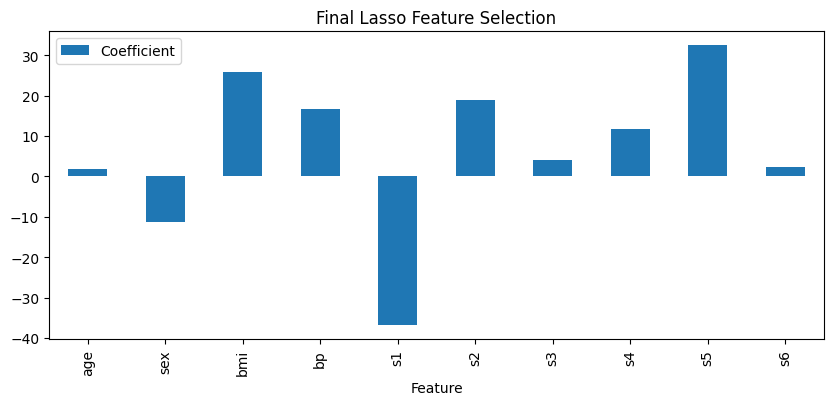

In [16]:
final_coef.plot(
    x="Feature",
    y="Coefficient",
    kind="bar",
    figsize=(10,4),
    title="Final Lasso Feature Selection"
)


Why visuals matter

Zero bars → eliminated features

Non-zero bars → retained features

Makes sparsity undeniable

## One-line summary you should remember

Lasso is not about being the most accurate — it is about being accurate with the fewest features possible.